In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




### Univeriate analysis on Numerical columns

### Passenger Id

**Conclusion**

- This column does not take any crucial part in the process of analysis

### Age

**Conclusion**

- Age is almost normally distributed
- Approx 20% of the values are missing
- There are some outliers

In [ ]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

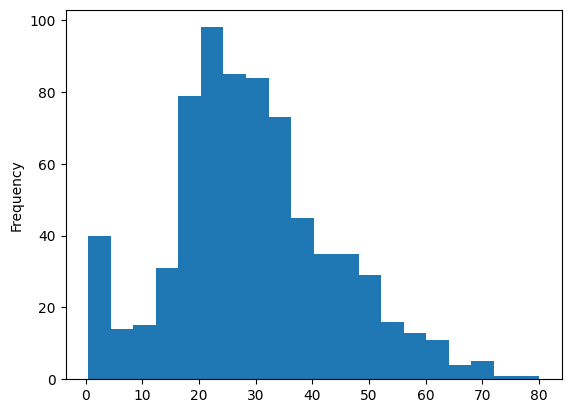

In [ ]:
df['Age'].plot(kind = 'hist', bins = 20)

<Axes: ylabel='Density'>

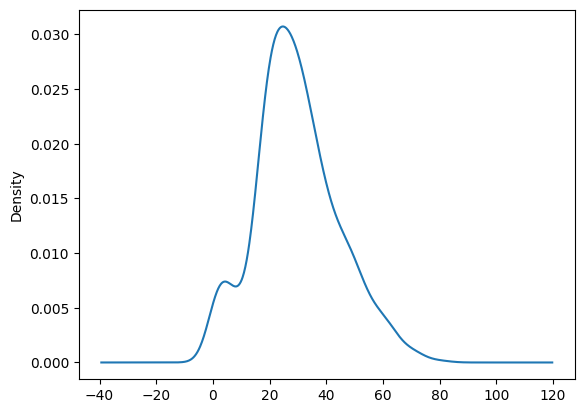

In [ ]:
df['Age'].plot(kind = 'kde')

In [ ]:
df['Age'].skew()

0.38910778230082704

<Axes: >

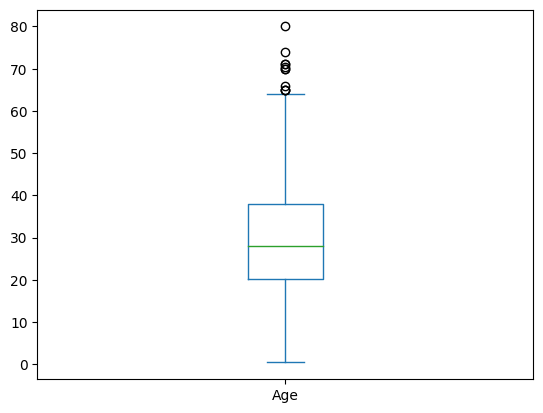

In [ ]:
df['Age'].plot(kind = 'box')

In [ ]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [ ]:
df['Age'].isnull().sum()

177

In [ ]:
df['Age'].isnull().sum()/len(df['Age'])

0.19865319865319866

### Fare

***Conclusions***

- Data is highly and positively skewed
- Fare column actually contains the group fare and not the individual fare( this might be an issue)
- We need to create a new column called Individual_fare

In [ ]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [ ]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

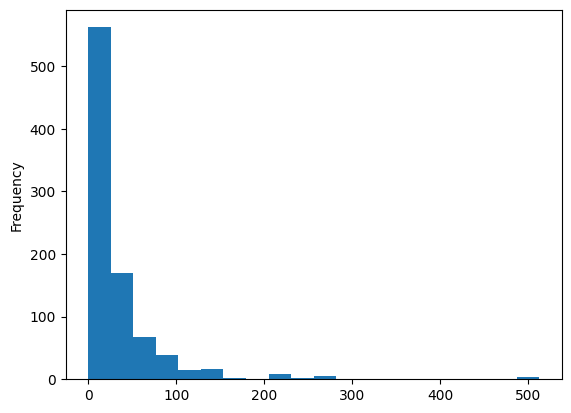

In [ ]:
df['Fare'].plot(kind = 'hist', bins = 20)

<Axes: ylabel='Density'>

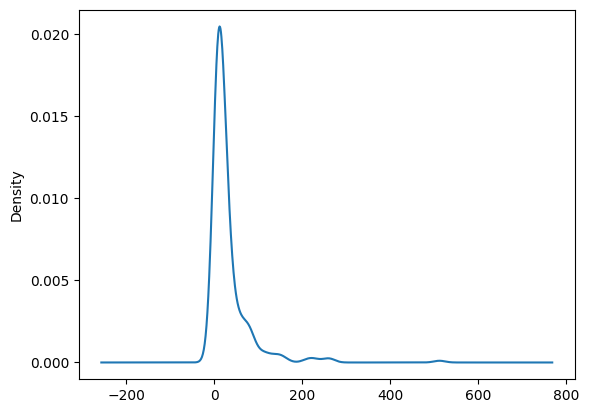

In [ ]:
df['Fare'].plot(kind = 'kde')

In [ ]:
df['Fare'].skew()

4.787316519674893

<Axes: >

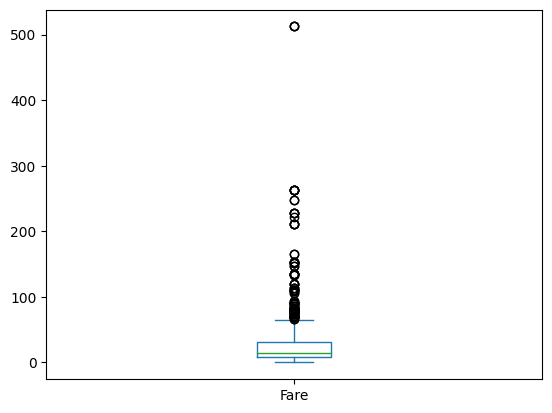

In [ ]:
df['Fare'].plot(kind = 'box')

In [ ]:
df[df['Fare']>250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [ ]:
df['Fare'].isnull().sum()

0

### Univeriate analysis on Cetogorial columns

### Survived

***Conclusions***

- We can see only 40% of the passengers survived

In [ ]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: >

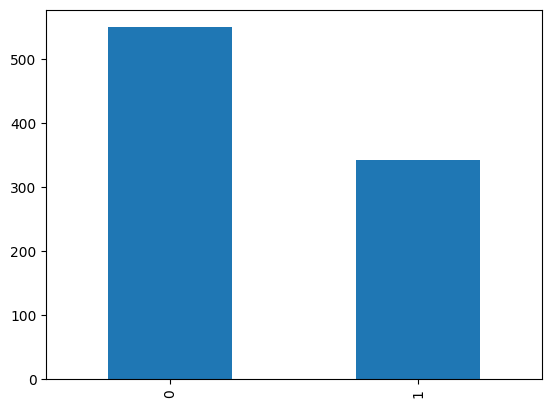

In [ ]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='Survived'>

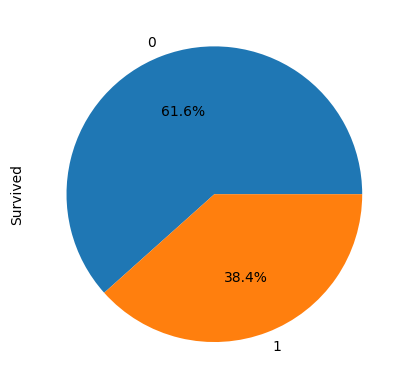

In [ ]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Survived'].sum()

342

In [ ]:
df['Survived'].isnull().sum()

0

### Passanger class

***Conclusions***

Less people traveled in Pclass 2 (20%) and more people Pclass 3 (55%) *italicized text*

In [ ]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: >

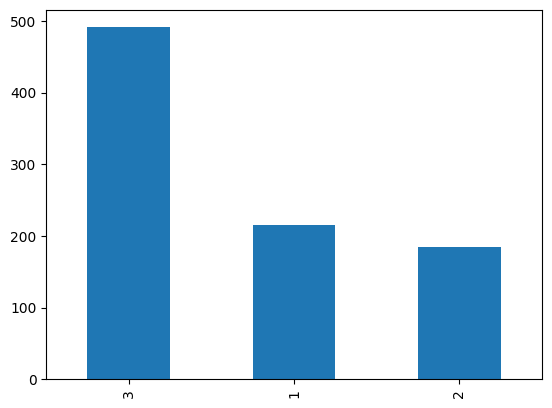

In [ ]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='Pclass'>

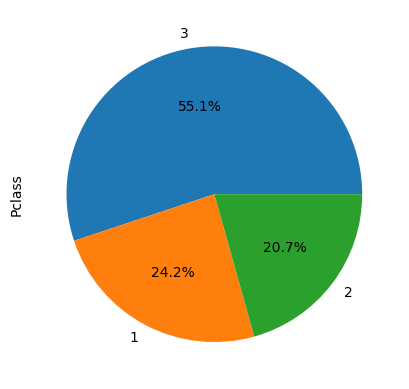

In [ ]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [ ]:
df['Pclass'].isnull().sum()

0

### Sex

***Conclusions***

Most of the passengers are male (65%)

In [ ]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: >

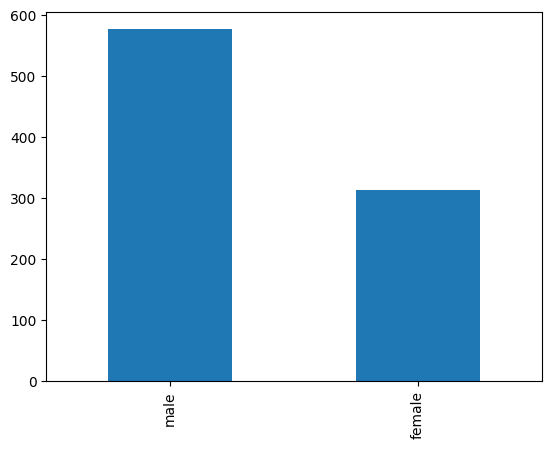

In [ ]:
df['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='Sex'>

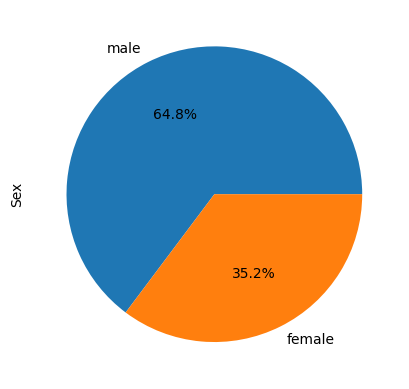

In [ ]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Sex'].isnull().sum()

0

### Siblings Spouse

***Conclusions***

Most of the passengers are solo traveler (65%)

In [ ]:
df['SibSp']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [ ]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: >

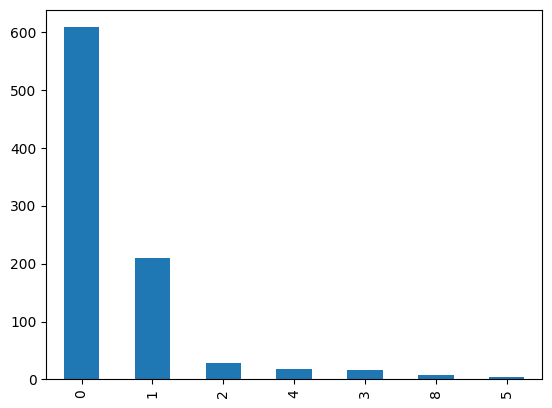

In [ ]:
df['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='SibSp'>

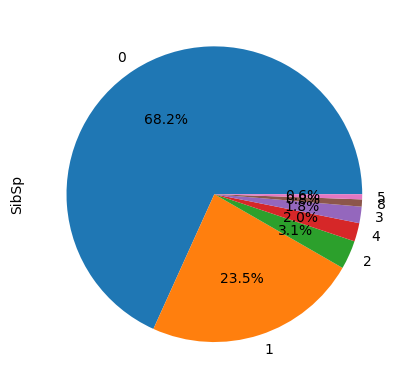

In [ ]:
df['SibSp'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [ ]:
df['SibSp'].isnull().sum()

0

### Perent Children

***Conclusions***

Most of the parents are solo traveler (65%)

Sibsp and Parch columns can be marged to form a column name Family_size

We can also create a column called Family_type

In [ ]:
df['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [ ]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<Axes: >

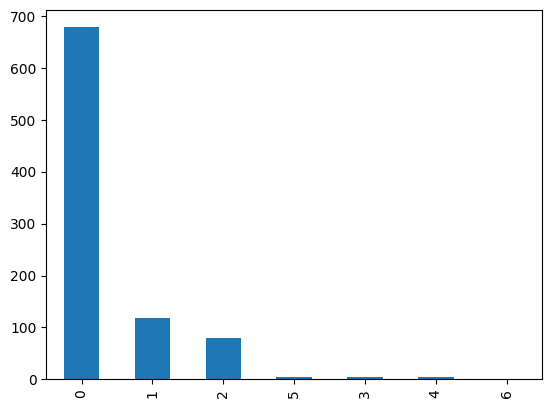

In [ ]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='Parch'>

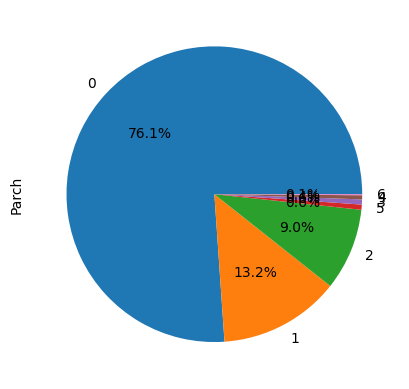

In [ ]:
df['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Parch'].isnull().sum()

0

### Embarked

***Conclusions***

Most of the passangers are on port Southampton port (almost 72%)

In [ ]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: >

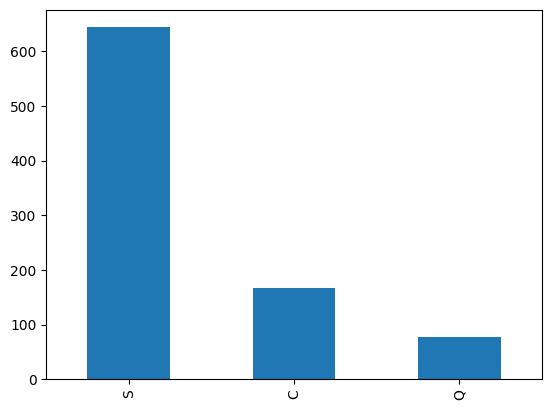

In [ ]:
df['Embarked'].value_counts().plot(kind = 'bar')

<Axes: ylabel='Embarked'>

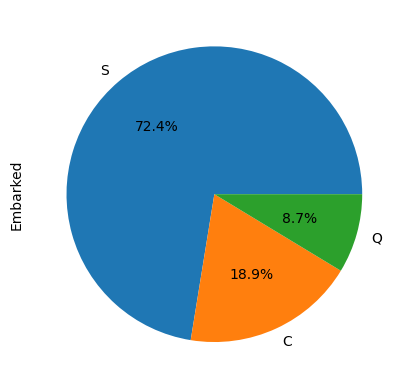

In [ ]:
df['Embarked'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [ ]:
df['Embarked'].isnull().sum()

2

### Univeriate analysis on Mixed columns

***Conclusion***

Need to Feature Engineering on Mixed columns to get more insights

### Biveriate analysis

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Survived and Pclass

***Conclusion***

- Most of the passengers from Pclass 3 died

- Pclass 1 was the safest class

In [ ]:
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [ ]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

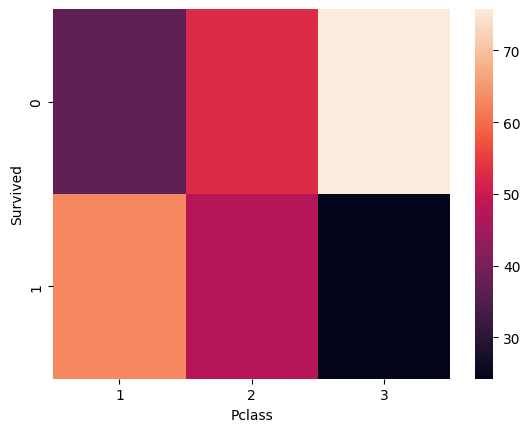

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

### Survived and Sex

***Conclusion***

- Most of the passengers survived were female

In [ ]:
pd.crosstab(df['Survived'],df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [ ]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

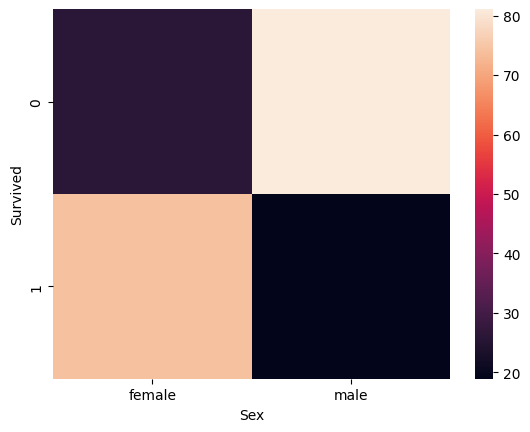

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100)

### Survived and Embarked

***Conclusion***

- Most of the passengers from Cherbourg port survived
- And that might be due to passengers from Cherbourg were either female or theu are in Pclass 1 as we have seen previous univariate analysis

In [ ]:
pd.crosstab(df['Survived'],df['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [ ]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


<Axes: xlabel='Embarked', ylabel='Survived'>

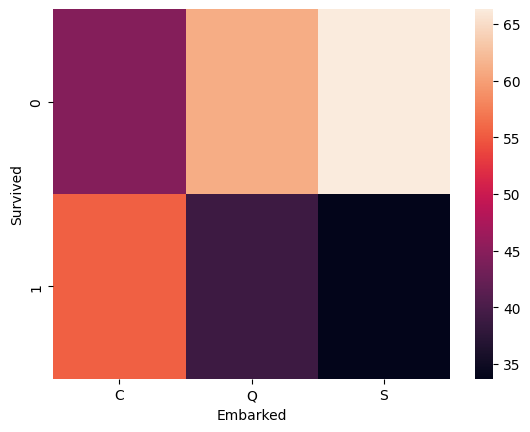

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100)

### Sex and Embarked and Pclass and Embarked

***Conclusion***

- We can conclude that due to most of the passengers from Cherbourg were on  Pclass 1 and that might be one factor that survival rate is higher here.

- Female assumption was not appropiate one

In [ ]:
pd.crosstab(df['Sex'],df['Embarked'])

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [ ]:
pd.crosstab(df['Sex'],df['Embarked'],normalize= 'columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


<Axes: xlabel='Embarked', ylabel='Sex'>

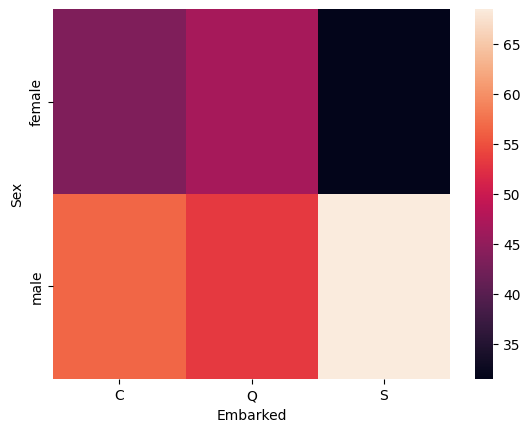

In [ ]:
sns.heatmap(pd.crosstab(df['Sex'],df['Embarked'],normalize= 'columns')*100)

In [ ]:
pd.crosstab(df['Pclass'],df['Embarked'])

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [ ]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize= 'columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


<Axes: xlabel='Embarked', ylabel='Pclass'>

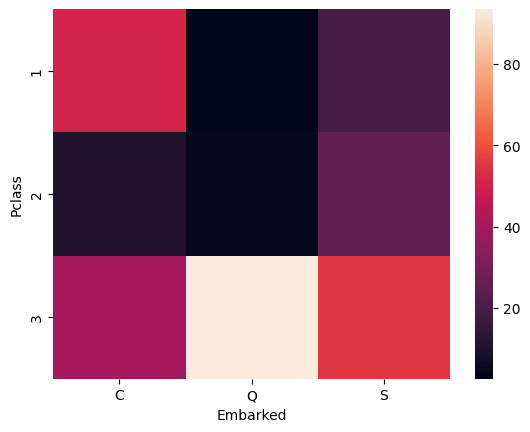

In [ ]:
sns.heatmap(pd.crosstab(df['Pclass'],df['Embarked'],normalize= 'columns')*100)

### Survived and Age

***Conclusion***

- There is a high chance of survival when passangers are less than 15(almost) years old and in between age of 38-45

<Axes: ylabel='Density'>

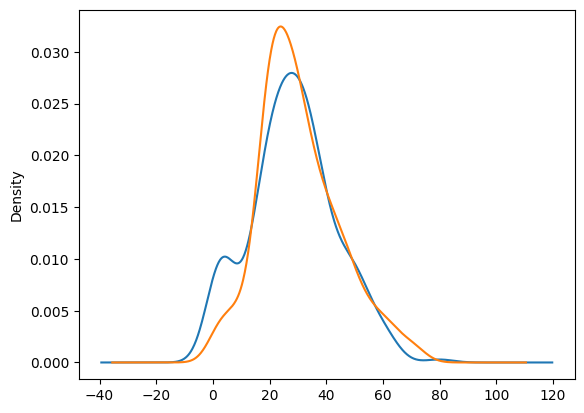

In [ ]:
df[df['Survived'] == 1]['Age'].plot(kind='kde', label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde', label='Not Survived')

### Feature engineering in fare column

In [ ]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


There is a chance that they from the same family cause surname is same, also fare amount is same and tickets are also same.

If that then 69.55/(8+2+1) = 6.32


In [ ]:
df[df['Ticket'] == 'CA. 2343'	]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


There is a problem that guy is travelling with family containg 11 members including himself. But Thare is  only 7 members showing. There is a chance that other members booked ticket separately.

In [ ]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


But here also 7 members are showing. There is chance that rest 4 are in the test.csv dataset (There is the rest of data not containing Survived column so that we can predict themself.)

In [ ]:
df2 = pd.read_csv('test.csv')

In [ ]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df = pd.concat([df,df2])

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df[df['Ticket'] == 'CA. 2343'	]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [ ]:
df['Ticket'].value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [ ]:
df['Individual_fare'] = df['Fare']/(df['SibSp']+df['Parch']+1)

In [ ]:
df['Individual_fare']

0        3.625000
1       35.641650
2        7.925000
3       26.550000
4        8.050000
          ...    
413      8.050000
414    108.900000
415      7.250000
416      8.050000
417      7.452767
Name: Individual_fare, Length: 1309, dtype: float64

<Axes: >

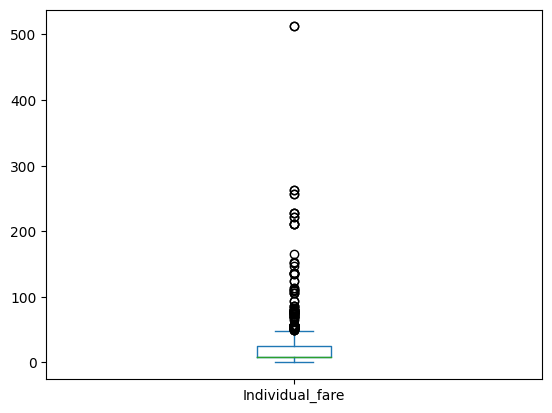

In [ ]:
df['Individual_fare'].plot(kind= 'box')

In [ ]:
df[['Individual_fare', 'Fare']].describe()

,Individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


There is someone who really paid 512 for fare. So this might not be an outlier

### Feature engineering in SibSp and Parch column(merging them)

In [ ]:
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1


### Creating a new catagrial column named as Family_type

1: alone

2-4: small

\>5: large

In [ ]:
def transform_family_type(num):
  if num == 1:
    return 'alone'
  if num>1 and num<5:
    return 'small'
  else:
    return 'large'

In [ ]:
df['Family_type'] = df['Family_size'].apply(transform_family_type)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


### Survived and Fare

***Conclusion***

- Most of the survivers were those whose individual fare price was more

In [ ]:
pd.crosstab(df['Survived'],df['Individual_fare'])

Individual_fare,0.000000,1.132143,2.409733,2.583333,2.618067,2.641667,2.875000,2.887500,3.125000,3.247900,...,134.500000,135.633300,146.520800,151.550000,153.462500,211.337500,221.779200,227.525000,256.164600,512.329200
Survived,,,,,,,,,,,,,,,,,,,,,
0.0,14,0,2,1,1,2,1,1,0,1,...,0,1,0,0,0,0,1,1,0,0
1.0,1,1,0,0,0,0,0,0,1,0,...,1,2,1,1,1,1,0,2,1,2


In [ ]:
pd.crosstab(df['Survived'],df['Individual_fare'], normalize='columns')*100

Individual_fare,0.000000,1.132143,2.409733,2.583333,2.618067,2.641667,2.875000,2.887500,3.125000,3.247900,...,134.500000,135.633300,146.520800,151.550000,153.462500,211.337500,221.779200,227.525000,256.164600,512.329200
Survived,,,,,,,,,,,,,,,,,,,,,
0.0,93.333333,0.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,...,0.0,33.333333,0.0,0.0,0.0,0.0,100.0,33.333333,0.0,0.0
1.0,6.666667,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,100.0,66.666667,100.0,100.0,100.0,100.0,0.0,66.666667,100.0,100.0


<Axes: xlabel='Individual_fare', ylabel='Survived'>

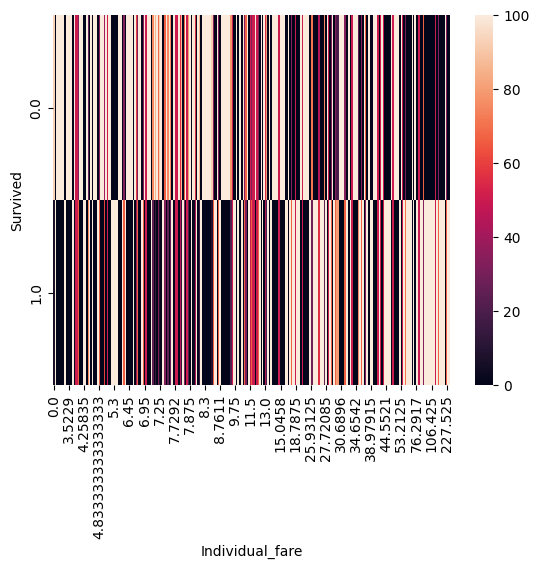

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Individual_fare'], normalize='columns')*100)

### Survived and Family_type

***Conclusion***

- There is a high chance of survival of the passenger is belongs to a small family

In [ ]:
pd.crosstab(df['Survived'],df['Family_type'])

Family_type,alone,large,small
Survived,,,
0.0,374,52,123
1.0,163,10,169


In [ ]:
pd.crosstab(df['Survived'],df['Family_type'], normalize='columns')*100

Family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


<Axes: xlabel='Family_type', ylabel='Survived'>

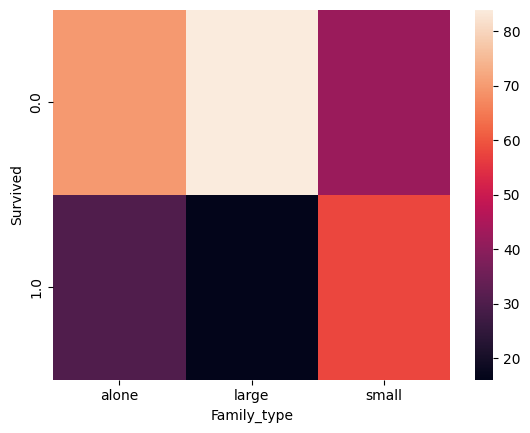

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Family_type'], normalize='columns')*100)

### Creating a new column Surname and Title (Feature engineering for name column)

In [ ]:
df['Name'].str.split(',')

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
413                                [Spector,  Mr. Woolf]
414                      [Oliva y Ocana,  Dona. Fermina]
415                      [Saether,  Mr. Simon Sivertsen]
416                               [Ware,  Mr. Frederick]
417                          [Peter,  Master. Michael J]
Name: Name, Length: 1309, dtype: object

In [ ]:
df['Name'].str.split(',').str.get(0)

0             Braund
1            Cumings
2          Heikkinen
3           Futrelle
4              Allen
           ...      
413          Spector
414    Oliva y Ocana
415          Saether
416             Ware
417            Peter
Name: Name, Length: 1309, dtype: object

In [ ]:
df['Surname'] = df['Name'].str.split(',').str.get(0)

In [ ]:
df['Title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type,Surname,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small,Braund,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small,Cumings,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone,Heikkinen,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small,Futrelle,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone,Allen,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone,Spector,Mr.
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone,Oliva y Ocana,Dona.
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone,Saether,Mr.
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone,Ware,Mr.


### Survived and Surname and Survived and Title

***Conclusion***

- We can see passenger with title 'Miss', 'Master', 'Mrs' got more sirvival rate and there is a chance they are female or belongs to higher passanger class

In [ ]:
pd.crosstab(df['Survived'],df['Surname'], normalize='columns')*100

Surname,Abbing,Abbott,Abelson,Adahl,Adams,Ahlin,Aks,Albimona,Alexander,Alhomaki,...,Yousseff,Yrois,Zabour,Zimmerman,de Messemaeker,de Mulder,de Pelsmaeker,del Carlo,van Billiard,van Melkebeke
Survived,,,,,,,,,,,,,,,,,,,,,
0.0,100.0,50.0,50.0,100.0,100.0,100.0,0.0,0.0,100.0,100.0,...,100.0,100.0,100.0,100.0,0.0,0.0,100.0,100.0,100.0,100.0
1.0,0.0,50.0,50.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0


In [ ]:
pd.crosstab(df['Survived'],df['Title'], normalize='columns')*100

Title,Capt.,Col.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the
Survived,,,,,,,,,,,,,,,,,
0.0,100.0,50.0,100.0,57.142857,100.0,0.0,50.0,42.5,30.21978,0.0,0.0,84.332689,20.8,0.0,100.0,0.0,0.0
1.0,0.0,50.0,0.0,42.857143,0.0,100.0,50.0,57.5,69.78022,100.0,100.0,15.667311,79.2,100.0,0.0,100.0,100.0


### Feature engineering for Cabin column (Creating a column Deck)

In [ ]:
df['Cabin'].isnull().sum()/len(df['Cabin'])

0.774637127578304

In [ ]:
df['Cabin'].fillna('M',inplace=True)

In [ ]:
df['Cabin'].value_counts()

M                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: Cabin, Length: 187, dtype: int64

In [ ]:
df['Deck'] = df['Cabin'].str[0]

In [ ]:
df['Deck'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

### Pclass and Deck and Deck and Survived

***Conclusion***

- Passenger with deck B,D,E,F got high chance of survivability

In [ ]:
pd.crosstab(df['Deck'],df['Pclass'])

Pclass,1,2,3
Deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


In [ ]:
pd.crosstab(df['Survived'],df['Deck'], normalize='columns')*100

Deck,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0.0,53.333333,25.531915,40.677966,24.242424,25.0,38.461538,50.0,70.014556,100.0
1.0,46.666667,74.468085,59.322034,75.757576,75.0,61.538462,50.0,29.985444,0.0


<Axes: xlabel='Deck'>

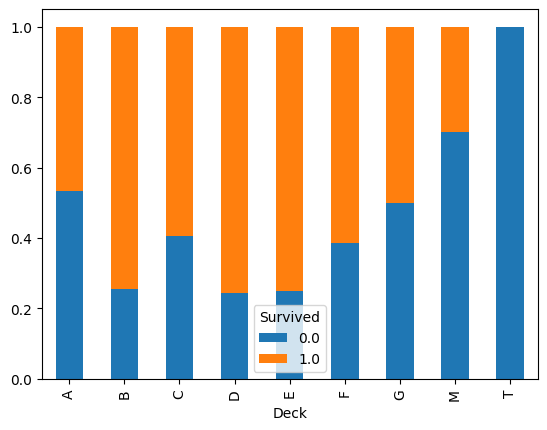

In [ ]:
pd.crosstab(df['Deck'],df['Survived'], normalize='index').plot(kind = 'bar', stacked=True)

### Multivariate analysis

In [ ]:
df.corr()

<ipython-input-50-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Individual_fare,Family_size
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428,0.035365,-0.031437
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.221600,0.016639
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.504270,0.050027
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,0.193545,-0.240229
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.089807,0.861952
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,-0.065498,0.792296
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,0.832029,0.226492
Individual_fare,0.035365,0.221600,-0.504270,0.193545,-0.089807,-0.065498,0.832029,1.000000,-0.094874
Family_size,-0.031437,0.016639,0.050027,-0.240229,0.861952,0.792296,0.226492,-0.094874,1.000000


<ipython-input-51-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

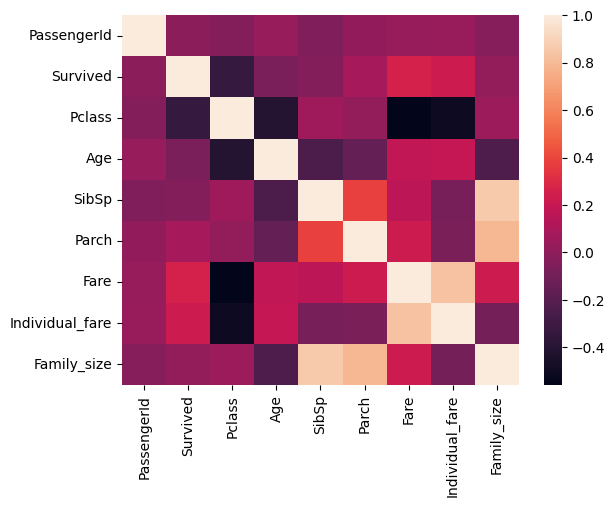

In [ ]:
sns.heatmap(df.corr())

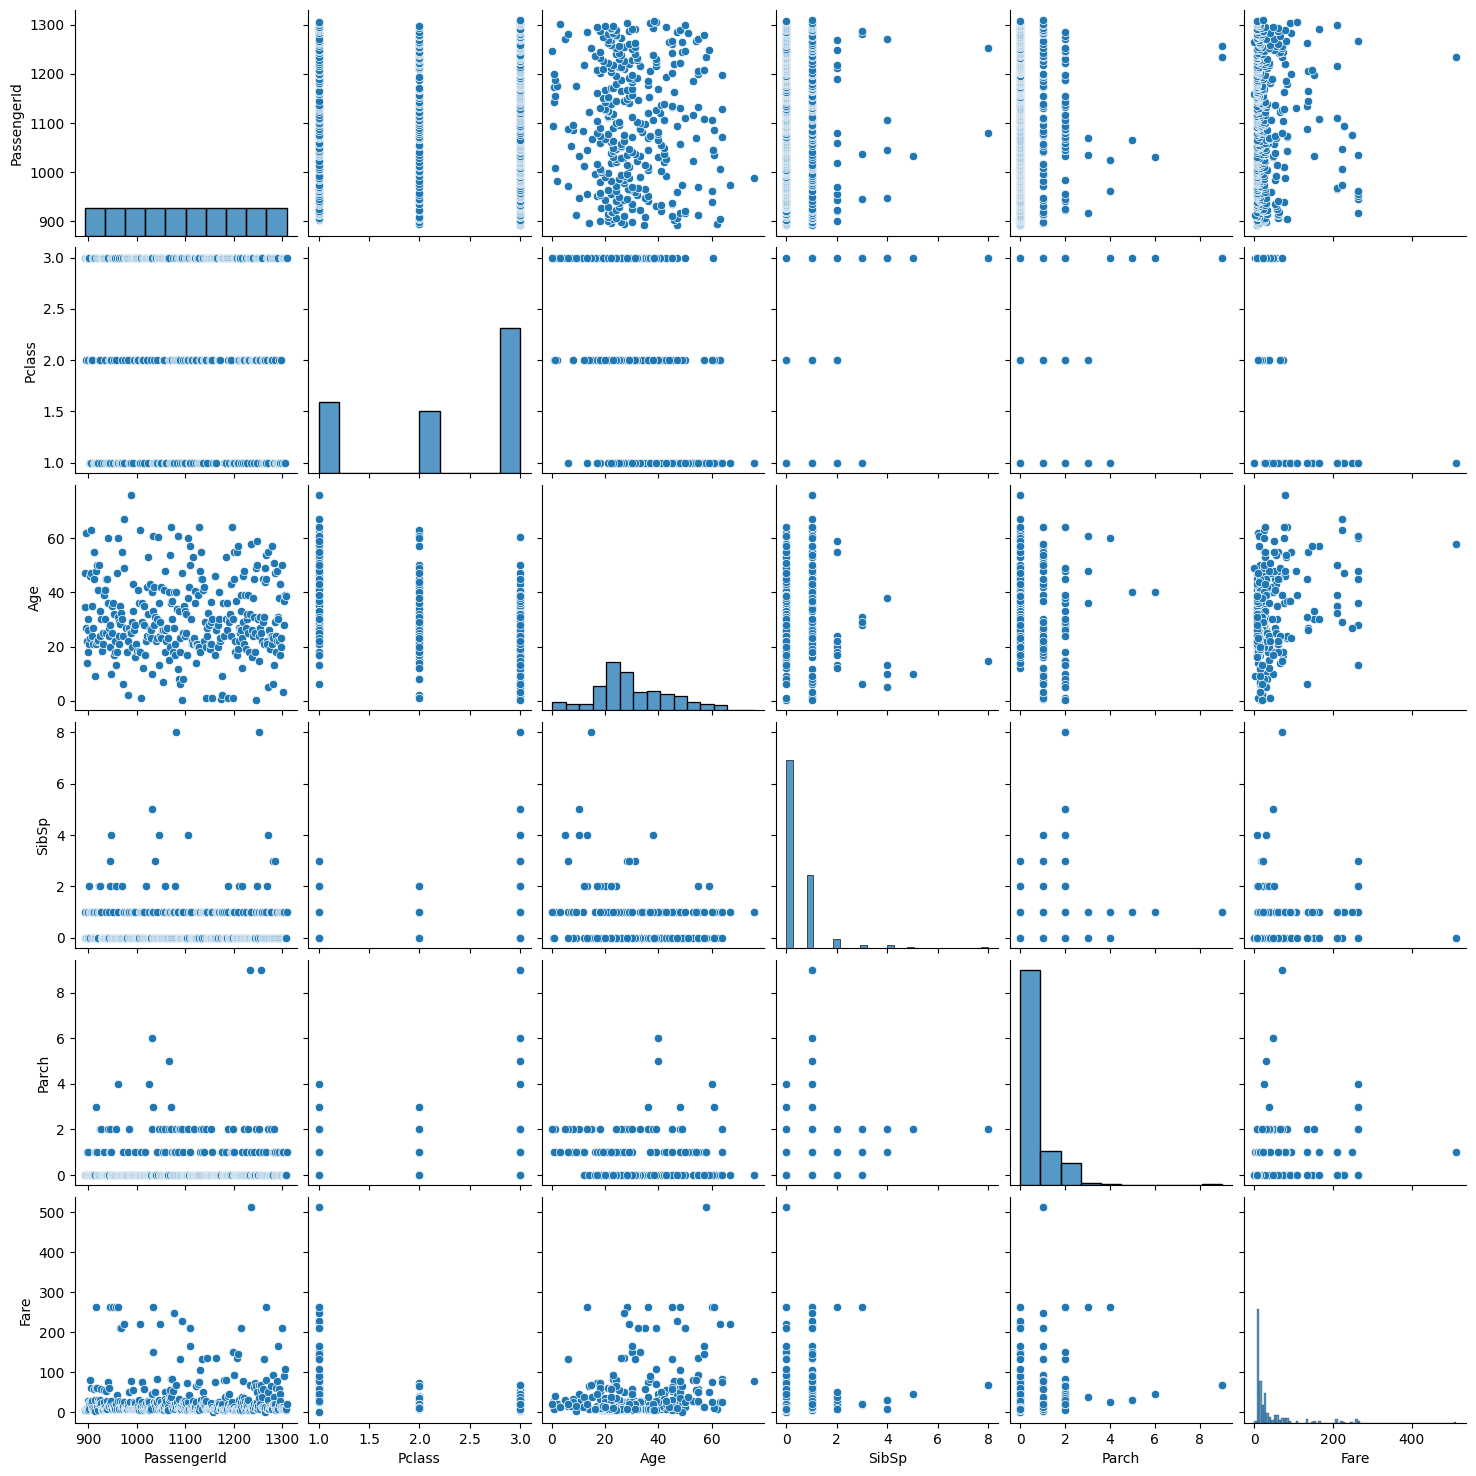

In [ ]:
sns.pairplot(df2)